# Assignment 2

### libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Exploratory analysis

In [3]:
df.describe() 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

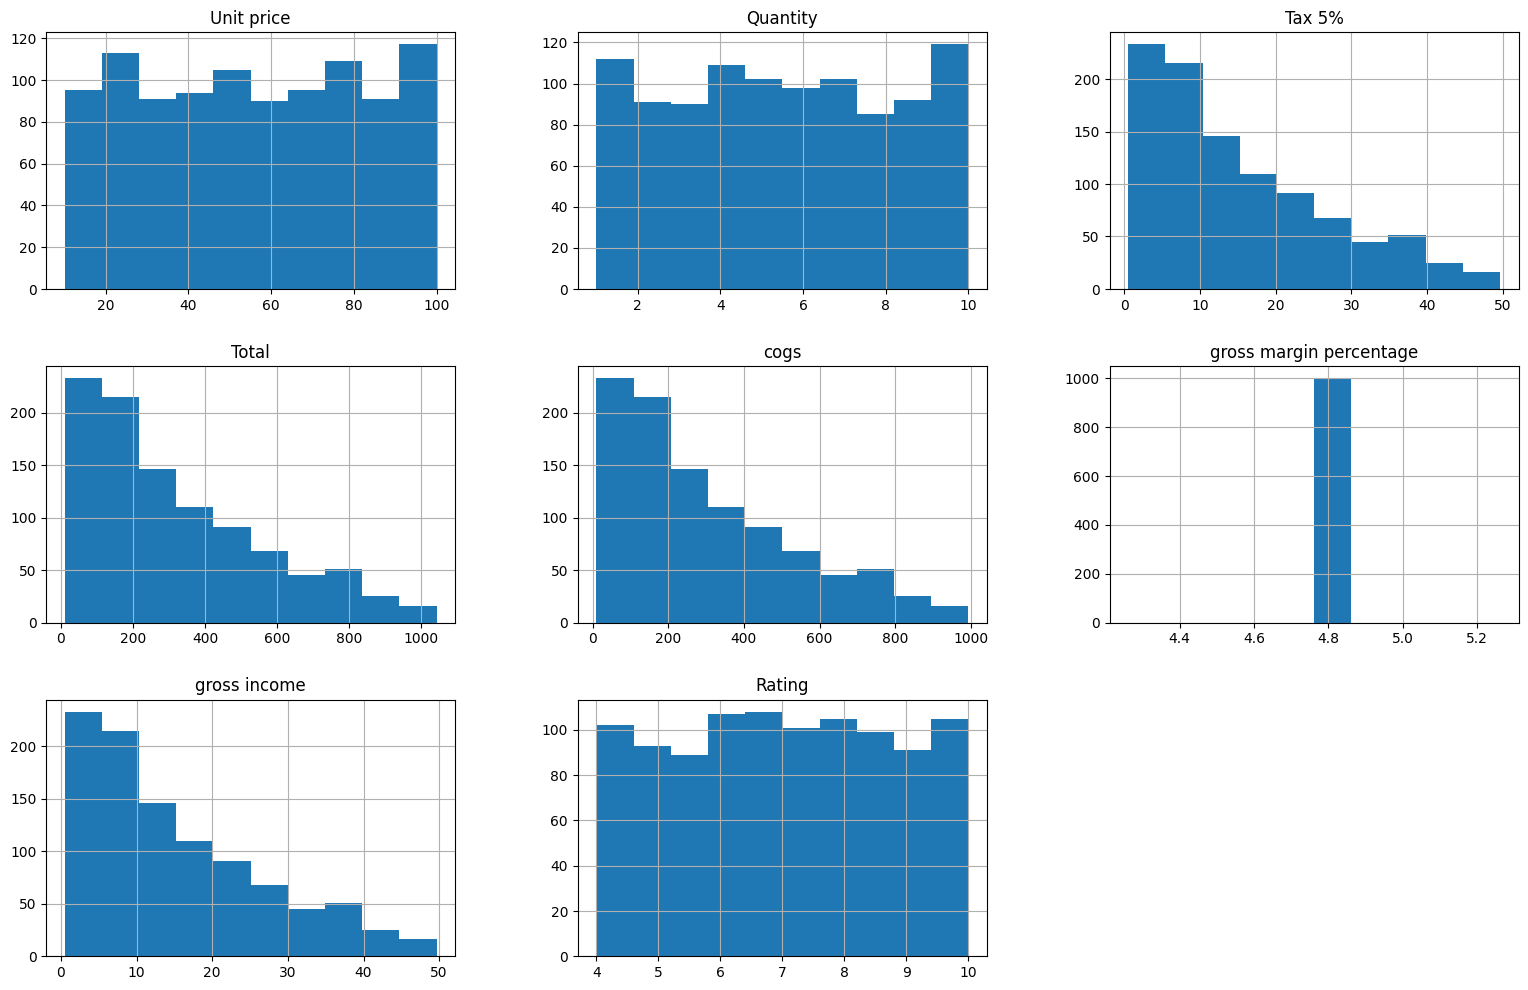

In [6]:
df.hist(figsize=(19,12))

<AxesSubplot:>

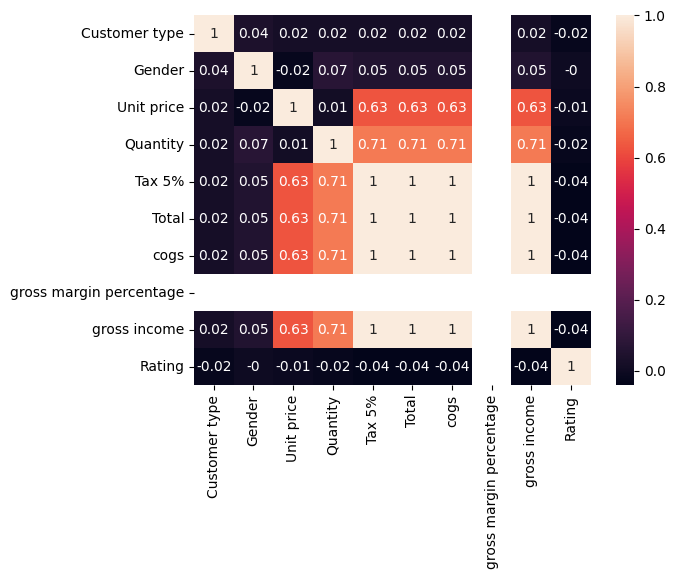

In [98]:
sns.heatmap(np.round(df.corr(),2),annot=True)

### Data cleaning

In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df=df.drop("Invoice ID",axis=1)
df=df.drop("City",axis=1)

In [9]:
def transformation(col):
    vals= set()
    for val in col: 
        vals.add(val)
    vals={item: index for index, item in enumerate(vals)}
    col_new=col.map(vals)    
    #print(col_new)
    print(vals)
    return col_new

In [10]:
df["Gender"]=transformation(df["Gender"])
df["Gender"]

{'Male': 0, 'Female': 1}


0      1
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    1
Name: Gender, Length: 1000, dtype: int64

In [11]:
df["Customer type"]=transformation(df["Customer type"])
df["Customer type"]

{'Normal': 0, 'Member': 1}


0      1
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    1
Name: Customer type, Length: 1000, dtype: int64

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])

<AxesSubplot:>

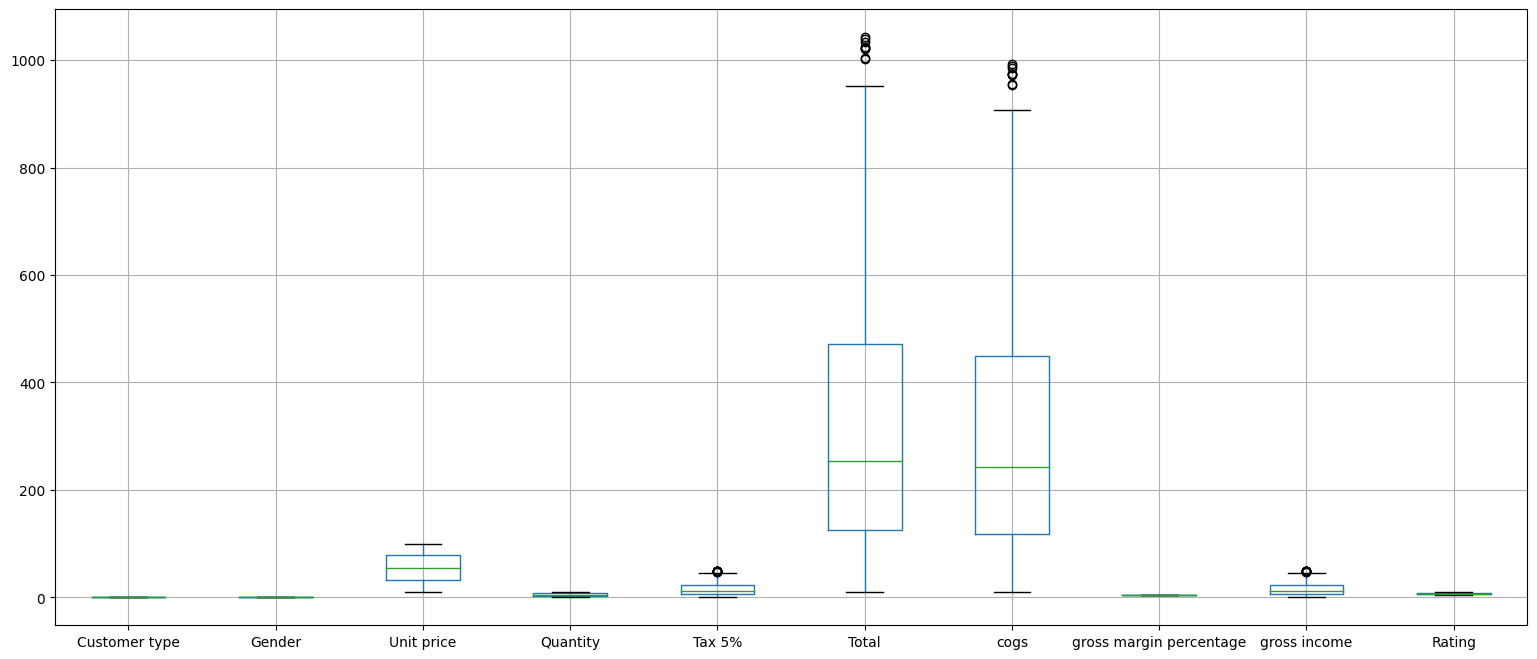

In [13]:
df.boxplot(figsize=(19,8))

## Store wise division

In [16]:
mask_a = df['Branch']=='A'
mask_b = df['Branch']=='B'
mask_c = df['Branch']=='C'
df_a = df[mask_a]
df_b = df[mask_b]
df_c = df[mask_c]

### Number of invoices 

Text(0.5, 1.0, 'Number of invoices for Stores A, B and C')

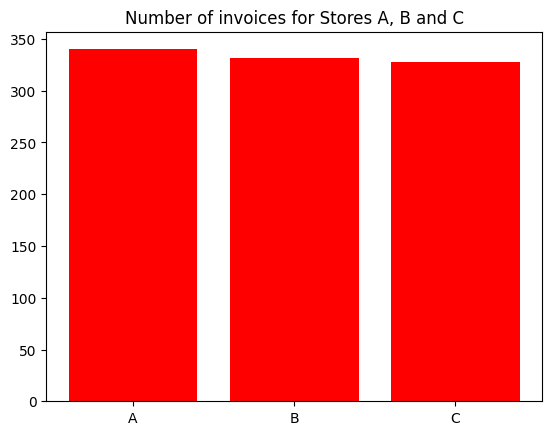

In [95]:
y=[len(df_a) ,len(df_b), len(df_c)]
x=["A","B","C"]
plt.bar(x,y,color='r')
plt.title("Number of invoices for Stores A, B and C")

### Average rating of each store

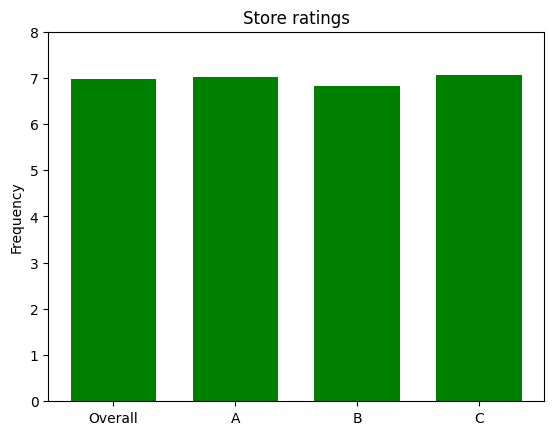

In [42]:
p=df["Rating"].sum()/len(df) # average customer rating accross all stores
q=df_a["Rating"].sum()/len(df_a)
r=df_b["Rating"].sum()/len(df_b)
s=df_c["Rating"].sum()/len(df_c)
labels=["Overall","A","B","C"]
fig, ax = plt.subplots()
width=0.7
rects1 = ax.bar(labels,[p,q,r,s], width, color='g')
ax.set_ylim(0,8)
ax.set_ylabel('Frequency')
ax.set_title('Store ratings')
ax.set_xticks(labels)


### Gross income over different stores

Text(0.5, 1.0, 'Gross income over different stores')

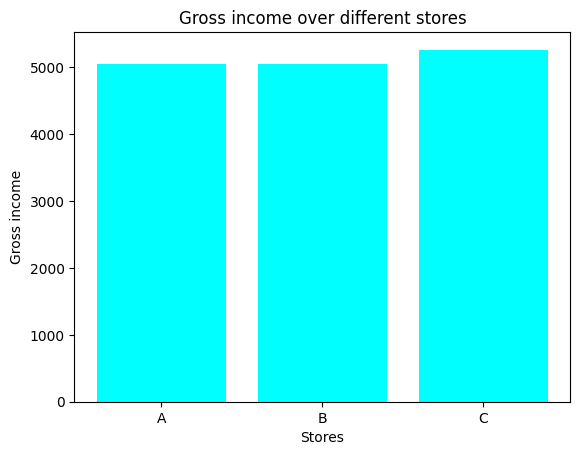

In [181]:
df_branchstats=df.groupby("Branch").sum("gross income")
df_branchstats = df_branchstats[["gross income"]]
plt.bar(df_branchstats.index,df_branchstats["gross income"],color="cyan")
plt.ylabel("Gross income")
plt.xlabel("Stores")
plt.title("Gross income over different stores")

### Product line sales for every store to see which product is making more by looking at gross income

In [78]:
df_a_products = df_a.groupby("Product line").sum()
df_a_products = df_a_products[["Customer type","Gender","Quantity","cogs","gross income"]]
df_b_products = df_b.groupby("Product line").sum()
df_b_products = df_b_products[["Customer type","Gender","Quantity","cogs","gross income"]]
df_c_products = df_c.groupby("Product line").sum()
df_c_products = df_c_products[["Customer type","Gender","Quantity","cogs","gross income"]]
df_products = df.groupby("Product line").sum()
df_products = df_products[["Customer type","Gender","Quantity","cogs","gross income"]]

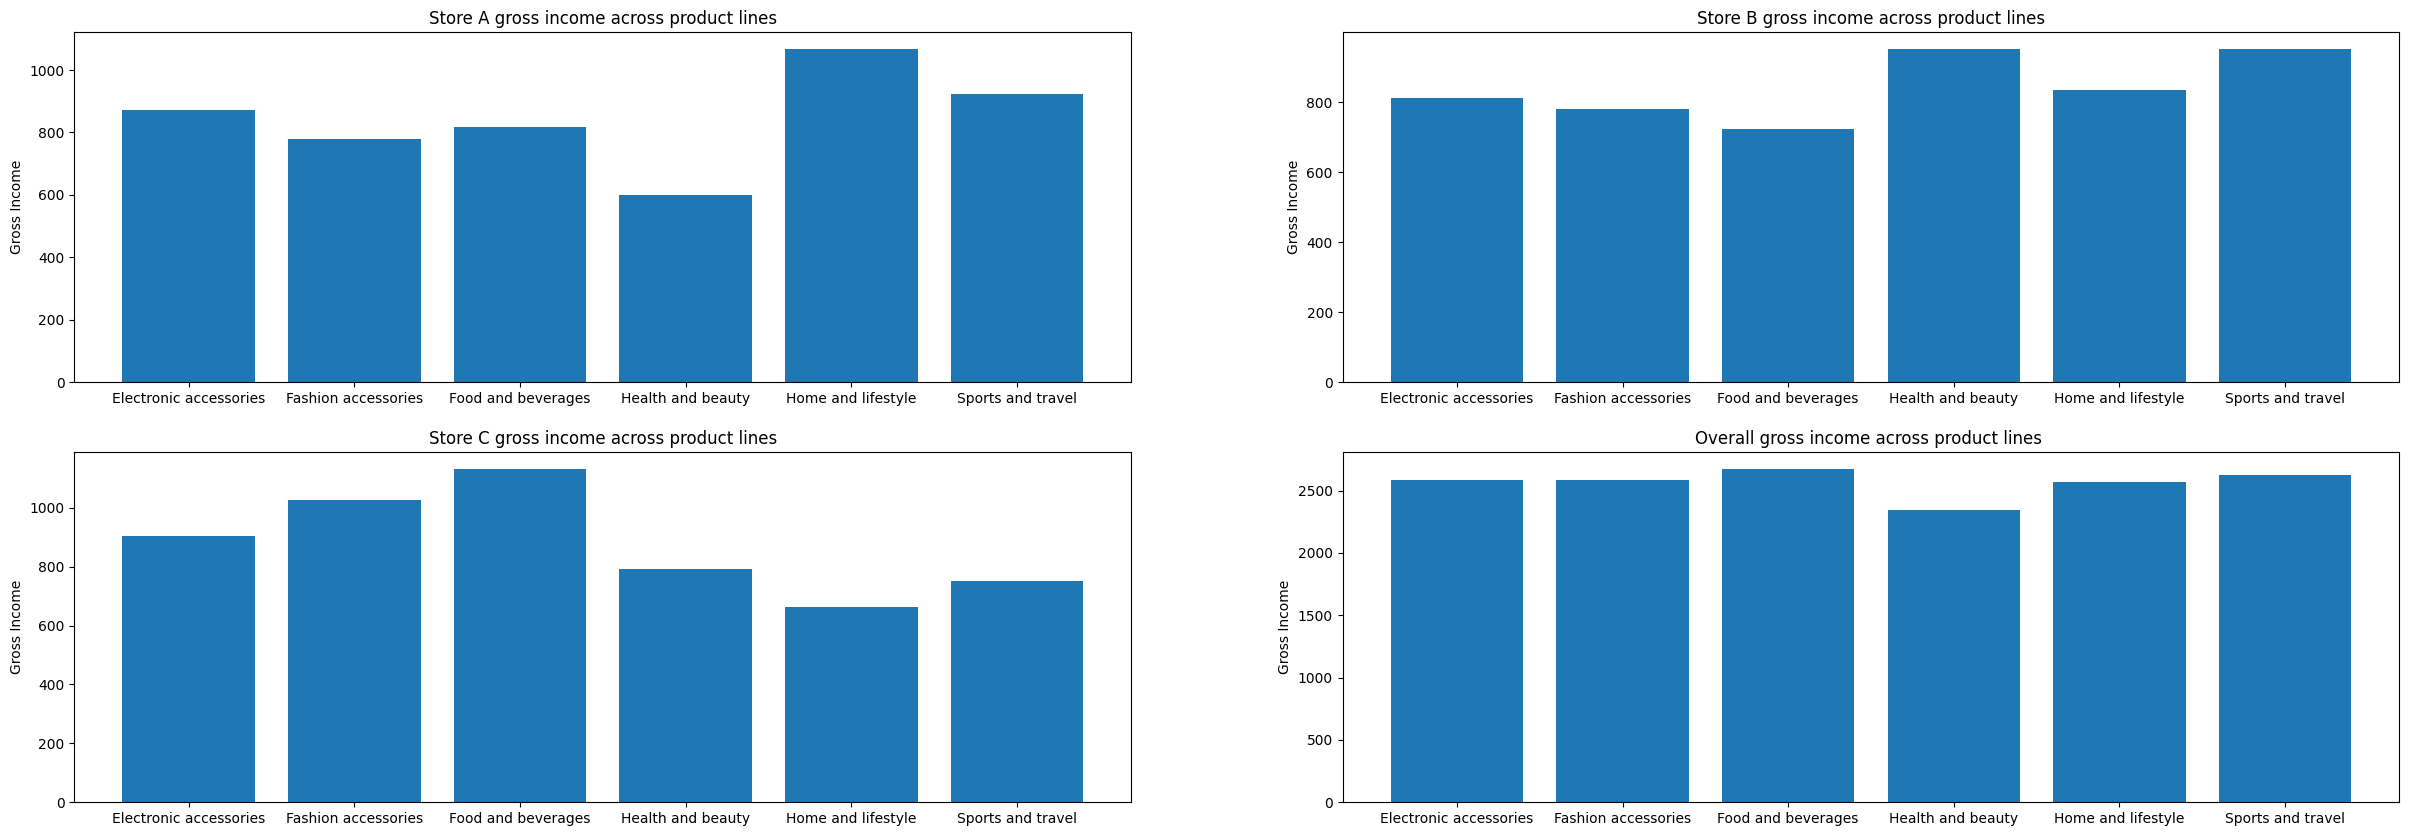

In [96]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(30,10))

ax1.bar(df_a_products.index,df_a_products["gross income"].values)
ax1.set_title("Store A gross income across product lines")
ax1.set_ylabel('Gross Income')

ax2.bar(df_b_products.index,df_b_products["gross income"].values)
ax2.set_title("Store B gross income across product lines")
ax2.set_ylabel('Gross Income')

ax3.bar(df_c_products.index,df_c_products["gross income"].values)
ax3.set_title("Store C gross income across product lines")
ax3.set_ylabel('Gross Income')

ax4.bar(df_products.index,df_products["gross income"].values)
ax4.set_title("Overall gross income across product lines ")
ax4.set_ylabel('Gross Income')

plt.show()

In [100]:
df["day"]=df["Date"].dt.day_name()
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,A,1,1,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-02-07 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,C,0,1,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-02-07 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,A,0,0,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-02-07 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,A,1,0,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-02-07 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,A,0,0,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-02-07 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


### Time based analysis 

In [123]:
df_day=df.groupby("day").sum()
df_day = df_day[["Quantity","gross income"]]

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = df_day.groupby(['day']).sum().reindex(cats) 
df_day

,Quantity,gross income
day,,
Monday,638,1804.7180
Tuesday,862,2451.5355
Wednesday,800,2082.4350
Thursday,755,2159.4880
Friday,758,2091.7305
Saturday,919,2672.4195
Sunday,778,2117.0425


Text(0.5, 1.0, 'Gross income throughout the week')

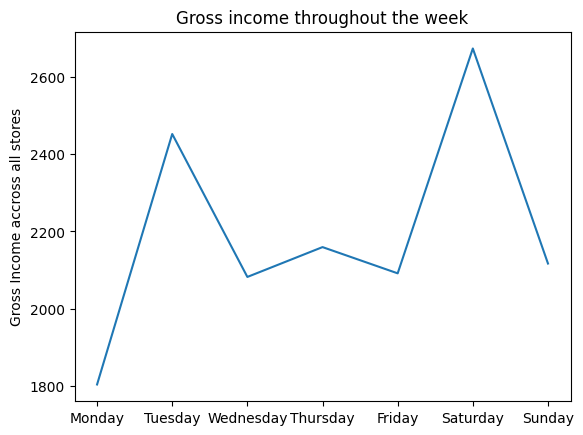

In [124]:
plt.plot(df_day.index,df_day["gross income"])
plt.ylabel("Gross Income accross all stores")
plt.title("Gross income throughout the week")

In [131]:
df["hour"]=df["Time"].dt.hour
df.tail()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,hour
995,C,0,0,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2023-02-07 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,13
996,B,0,1,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2023-02-07 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,17
997,A,1,0,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-02-07 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday,13
998,A,0,0,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-02-07 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Friday,15
999,A,1,1,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,2023-02-07 13:28:00,Cash,618.38,4.761905,30.9190,6.6,Monday,13


In [144]:
df_hour=df.groupby("hour").size()


101

Text(0.5, 1.0, 'Foot traffic through the day')

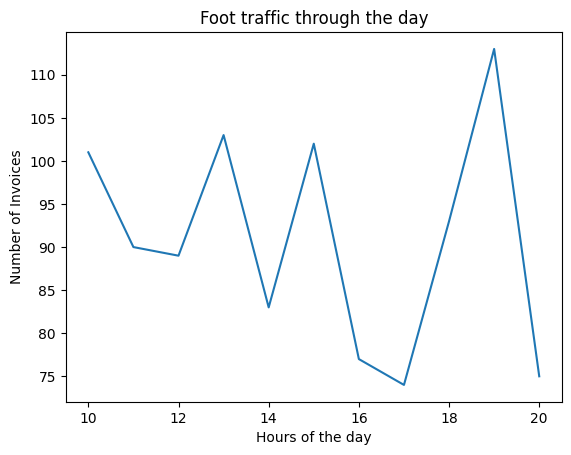

In [146]:
plt.plot(df_hour.index,df_hour)
plt.ylabel("Number of Invoices")
plt.xlabel("Hours of the day")
plt.title("Foot traffic through the day")

In [155]:
df_dates=df.groupby("Date").size()
plt.plot()

Date
2019-01-01    12
2019-01-02     8
2019-01-03     8
2019-01-04     6
2019-01-05    12
              ..
2019-03-26    13
2019-03-27    10
2019-03-28    10
2019-03-29     8
2019-03-30    11
Length: 89, dtype: int64

Text(0.5, 1.0, 'Foot traffic')

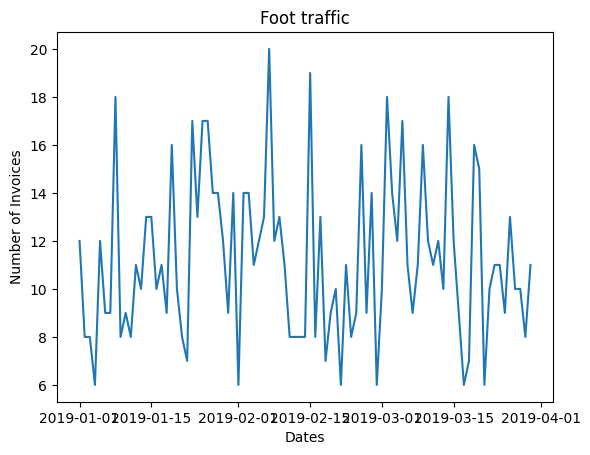

In [156]:
plt.plot(df_dates.index,df_dates)
plt.ylabel("Number of Invoices")
plt.xlabel("Dates")
plt.title("Foot traffic")

Text(0.5, 1.0, 'Foot traffic')

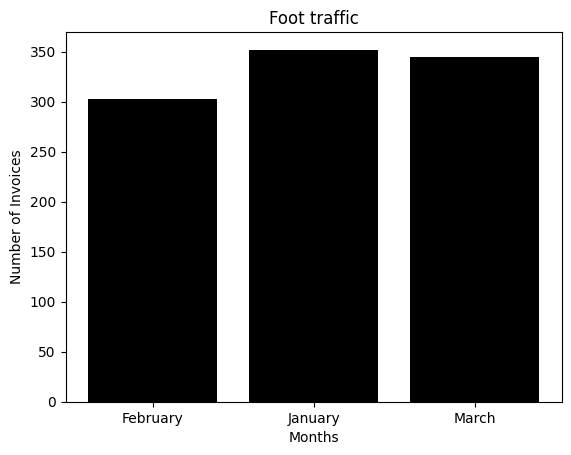

In [163]:
df["month"]=df["Date"].dt.strftime('%B')
df_month=df.groupby("month").size()
plt.bar(df_month.index,df_month,color="black")
plt.ylabel("Number of Invoices")
plt.xlabel("Months")
plt.title("Foot traffic")

### Gender Based Analysis

In [182]:
df_gender=pd.crosstab(df["Gender"],df["Product line"])

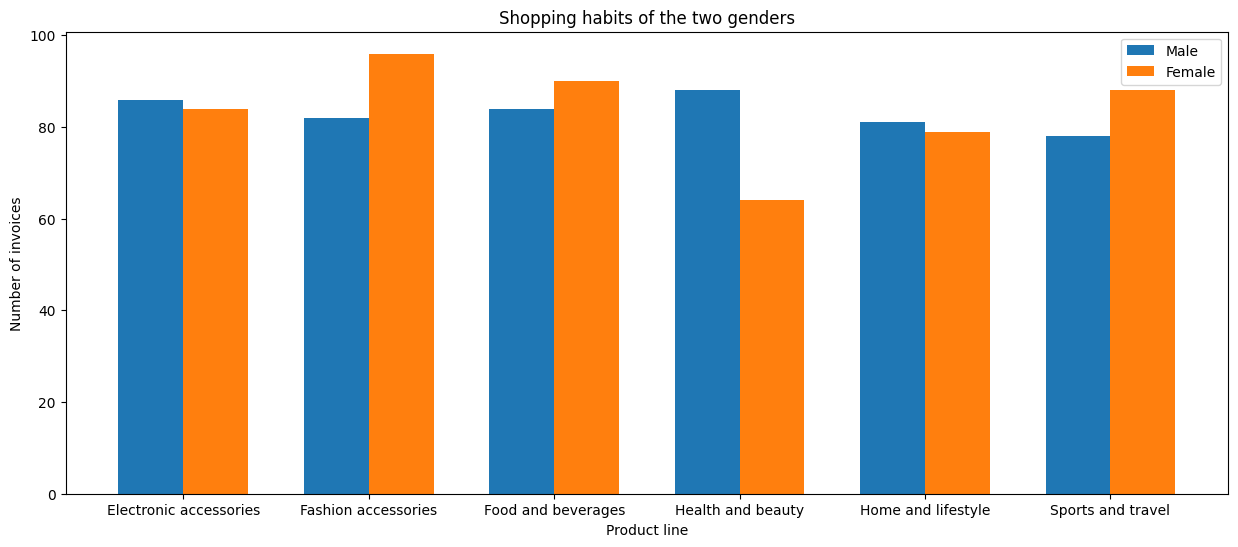

In [183]:
fig, ax = plt.subplots(figsize=(15,6))
x = np.arange(len(df_gender.columns))
width = 0.35
rects1 = ax.bar(x - width/2, df_gender.iloc[0], width, label='Male')
rects2 = ax.bar(x + width/2, df_gender.iloc[1], width, label='Female')

ax.set_xlabel('Product line')
ax.set_ylabel('Number of invoices')
ax.set_title('Shopping habits of the two genders')
ax.set_xticks(x)
ax.set_xticklabels(df_gender.columns)
ax.legend()
plt.show()

In [184]:
df_gen_ct=pd.crosstab(df["Customer type"],df["Gender"])

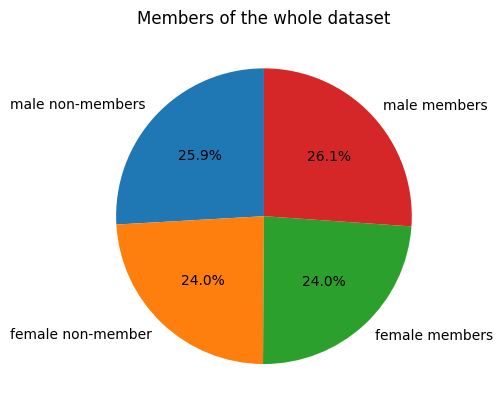

In [186]:
labels=["male non-members","female non-member","female members", "male members"]
fig, ax = plt.subplots()
d=df_gen_ct.values.flatten()/10
ax.pie(x=d, labels=labels, startangle=90,autopct='%1.1f%%')
ax.set_title('Members of the whole dataset')
plt.show()